# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *J*

**Names:**

* *Rafael Bischof*
* *Jeniffer Lima Graf*
* *Alexander Sanchez*

---

#### Instructions

*This is a template for part 2 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

---

## 2.2 Network sampling

#### Exercise 2.7: Random walk on the Facebook network

In [6]:
# Base url of the API
URL_TEMPLATE = 'http://iccluster040.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
# Target user id
user_id = 'f30ff3966f16ed62f5165a229a19b319'

def getData(user_id):
    url = URL_TEMPLATE.format(user_id=user_id)
    response = requests.get(url)
    return response.json()

In [24]:
ages = np.zeros(120) # Assuming that there are no persons older than 120 on facebook
num_friends = np.zeros(120)
number = 500
for i in range(number):
    print('\r Progress: %d' % (i+1),'/', number, end='' )
    data = getData(user_id)
    ages[data['age']] = ages[data['age']] + 1
    num_friends[data['age']] = num_friends[data['age']] + len(data['friends'])
    user_id = np.random.choice(data['friends'])

 Progress: 500 / 500

In [25]:
print('Nodes visited:', number)
print('Average age:', np.sum(np.linspace(0, 119, 120) * ages) / number)

Nodes visited: 500
Average age: 21.78


#### Exercise 2.8

Our calculated average age is far below the actual average of 43.3.<br>
To understand why this is the case, let's calculate the average number of friends per years of age:

Text(0, 0.5, 'Average # of friends')

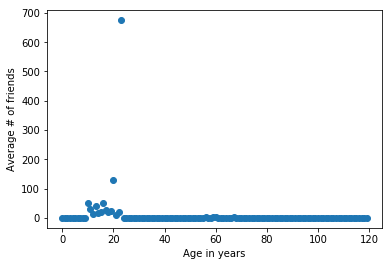

In [31]:
average_friends = np.zeros(120)
for i in range(120):
    if ages[i] != 0:
        average_friends[i] = num_friends[i] / ages[i]

plt.scatter(range(120),average_friends)
plt.xlabel('Age in years')
plt.ylabel('Average # of friends')

<p>It is quite clearly visible that younger people have many more friends on average than older people. <br>
Therefore, the fact that our calculated average is so low can be explained by the friendship paradox:<br>
<b>It is more likely to be friends with someone who has a lot of friends. </b><br>
In our case, the ones with more friends are the younger people, and when choosing a person from the friends lists, we are more likely to be picking a younger person.</p>

<p>To avoid this problem, we should not pick a person at random from the friends lists, but choose a random userId.<br>
But since we don't have a set of all userIds to uniformly choose from and trying to generate and guess userIds is very inefficient, we instead apply the <b>unbiased estimator</b> that we saw in class:</p>


In [32]:
number = 500
ages = np.array([])
unbiased_ages = np.array([])
friends_num = np.array([])

for i in range(number):
    print('\r Progress: %d' % (i+1),'/', number, end='' )
    data = getData(user_id)
    ages = np.append(ages, data['age'])
    friends_num = np.append(friends_num, len(data['friends']))
    unbiased_ages = np.append(unbiased_ages, np.sum(ages/friends_num) / np.sum(friends_num**-1))
    user_id = np.random.choice(data['friends'])
    
print('\nUnbiased mean:', np.mean(unbiased_ages))

 Progress: 500 / 50000
Unbiased mean: 42.967943125461915


Now we are much closer to the actual average.